# **1 - Perkenalan**

- Nama : Afifah Rahma Tifani
- Batch : 015 - RMT
- Dataset : Spotify App Reviews
- Objective : Sentiment Analysis of Spotify App Reviews

Sentimen Analysis merupakan sebuah proses untuk mendeteksi sentimen dari sebuah teks. Sentimen Analysis dapat membantu business dalam hal mendeteksi pengalaman customer terkini dan nantinya dapat dijadikan insights dalam pembuatan strategi untuk memuaskan customer.


Dalam notebook ini, akan dilakukan modelling pada dataset Spotify App Reviews untuk menghasilkan model yang dapat mengklasifikasi review user kedalam sentimen 'Bad' atau 'Good'. Dataset didapatkan dari kaggle.com. Dimana dataset berisi review dan rating yang ditulis user Spotify di Google Play Store dari bulan Januari 2022 hingga bulan Juli 2022.

Sebelum dilakukan modelling, dilakukan preprocessing pada review terlebih dahulu. Model yang dibuat adalah model RNN. Hasil akhir model yaitu nilai accuracy test set sebesar 87% dan nilai f1-score untuk kategori sentimen `Bad` sebesar 0.87 dan kategori `Good` sebesar 0.86. 


Deskripsi fitur dalam dataset:

|Feature Name|Description|
|:--|:--|
|**Time_submitted** |At what time the review was submitted.|
|**Review** |Review text.|
|**Rating** |Given score (1-5).|
|**Total_thumbsup** |How many people found the review helpful.||**Reply** |Review reply.|

# **2 - Import Libraries**


In [1]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings('ignore')

import re
import string
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tensorflow.keras.layers import TextVectorization, Embedding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.metrics import Recall
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU, Dropout
from tensorflow.keras.models import Model, Sequential

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# **3 - Data Loading**

In [3]:
# Load Dataset

df = pd.read_csv('https://raw.githubusercontent.com/afifahrahma/learning_data/main/reviews.csv')
df

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
...,...,...,...,...,...
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN


In [4]:
# Check dataset - 1

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


- Dataset terdiri atas 5 kolom dan 61594 entries. 3 kolom memiliki tipe data object, sedangkan 2 kolom lainnya memiliki tipe data integer.
- Terdapat missing values pada kolom `reply`.

In [5]:
# Check dataset - 2

df.describe()

,Rating,Total_thumbsup
count,61594.000000,61594.000000
mean,3.155989,7.649381
std,1.673285,89.323143
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8195.000000


- Thumbs up paling banyak yang didapatkan oleh review adalah 8195.
- Rating berkisar antara 1 dan 5.

# **4 - Exploratory Data Analysis I**

5    22095
1    17653
4     7842
2     7118
3     6886
Name: Rating, dtype: int64



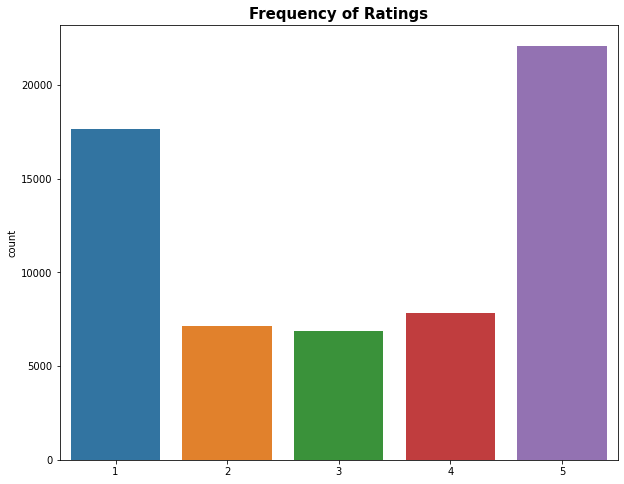

In [6]:
# See the frequency of ratings

print(df['Rating'].value_counts())
print('')

figure(figsize=(10, 8))
sns.countplot(x = 'Rating', data = df)
plt.title('Frequency of Ratings', weight='bold', fontsize=15)
plt.xlabel('')
plt.show()

- Rating paling banyak adalah rating 5 dengan jumlah rating lebih dari 22000. Lalu rating terbanyak kedua adalah rating 1 dengan 17600 rating.

Selanjutnya, kita akan menginterpretasi rating menjadi sentimen. Kita mengubah rating dibawah sama dengan tiga menjadi label `Bad` dan rating diatas tiga menjadi label `Good`. Sentimen ini yang akan menjadi label untuk model.

In [7]:
# Changing rating into label "Good" and "Bad"
def ratings(rating):
  if rating > 3:
    return "Good"
  else:
    return "Bad"

df['Rating'] = df['Rating'].apply(ratings)

Bad     31657
Good    29937
Name: Rating, dtype: int64



Text(0.5, 1.0, 'Sentiments of Reviews')

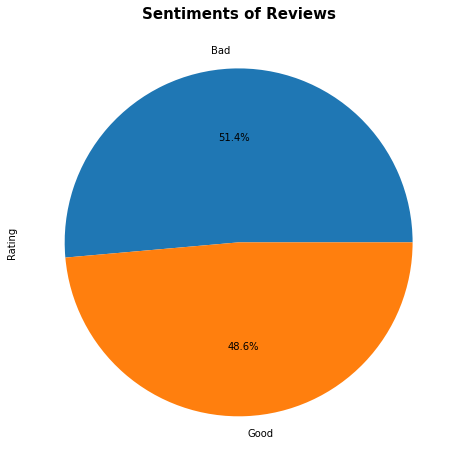

In [8]:
# See value counts of Rating

print(df['Rating'].value_counts())
print('')
df.Rating.value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%')
plt.title('Sentiments of Reviews', weight='bold', fontsize=15)

- 51.4% Review memiliki sentimen `Bad`, sedangkan 48.6% review lainnya memiliki sentimen `good`. 
- Dataset yang kita miliki cukup balance. Sehingga tidak diperlukan handling imbalance.

In [9]:
# Change data type to datetime so we can easily make plot and graphs
df['Time_submitted'] = pd.to_datetime(df['Time_submitted'])
df['Date']=df['Time_submitted'].dt.date

In [10]:
# Number of reviews per date

date = df.groupby(['Date'])['Review'].count().reset_index().rename(columns = {'Date' : 'Date', 'Review' : 'Number of Reviews'})
date

,Date,Number of Reviews
0,2022-01-01,46
1,2022-01-02,43
2,2022-01-03,66
3,2022-01-04,56
4,2022-01-05,64
...,...,...
185,2022-07-05,454
186,2022-07-06,467
187,2022-07-07,476
188,2022-07-08,487


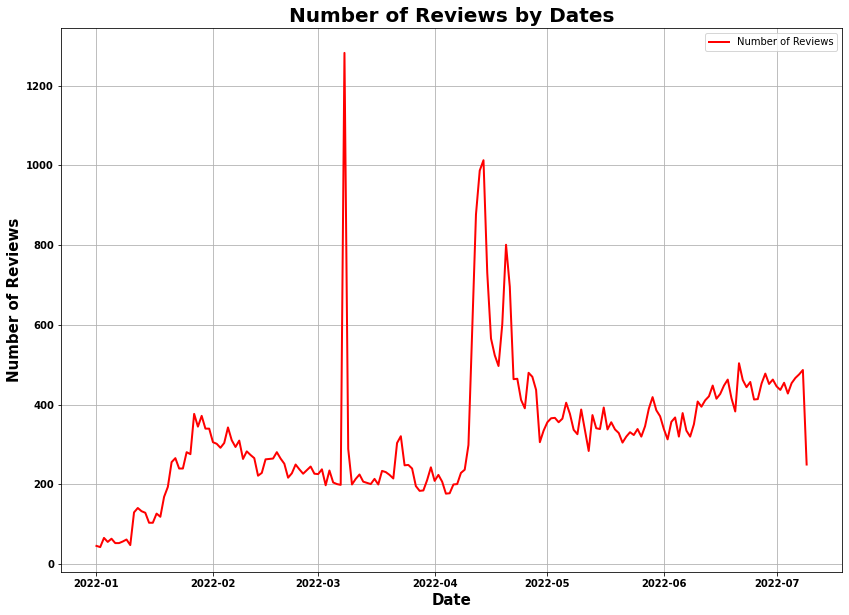

In [11]:
# Plot date and number of reviews

figure(figsize=(14, 10))

sns.lineplot(date['Date'], date['Number of Reviews'], color='red', markerfacecolor='red', 
             markersize=8, linewidth=2, label = "Number of Reviews")

plt.grid(True)
plt.title("Number of Reviews by Dates", weight='bold', fontsize=20)
plt.xlabel('Date', weight='bold', fontsize=15)
plt.xticks(weight="bold", fontsize=10)
plt.ylabel("Number of Reviews", weight="bold", color="black", fontsize=15)
plt.yticks( weight="bold",fontsize=10);

- Jumlah review spotify per hari cenderung naik turun.
- Pada awal bulan Maret 2022 terdapat lonjakan review yang ditulis oleh user Spotify.
- Lalu, pada pertengahan bulan April 2022 terdapat juga lonjakan review yang ditulis oleh user.

# **5 - Data Preprocessing**

In [12]:
# Drop unused columns

df.drop(['Time_submitted', 'Reply', 'Total_thumbsup', 'Date'], axis=1, inplace=True)

df.head()

,Review,Rating
0,"Great music service, the audio is high quality...",Good
1,Please ignore previous negative rating. This a...,Good
2,"This pop-up ""Get the best Spotify experience o...",Good
3,Really buggy and terrible to use as of recently,Bad
4,Dear Spotify why do I get songs that I didn't ...,Bad


In [13]:
# Get Data for Model Inference

df_inf1 = df.sample(10, random_state=1)

df_inf1

,Review,Rating
48549,Best experience easy to use and my favourite s...,Good
8069,just because of the ads,Bad
61094,I loved the old version of this app but the ne...,Bad
40704,One of the few apps I downloaded for my new ph...,Good
56785,Deleting the app. I don't need another source ...,Bad
50433,Amazing app!!! I don't have to select songs af...,Good
24587,This app sucks now. Bring back seeing full alb...,Bad
38133,This latest update has my app stopping the mus...,Bad
5921,I've had no choice but to resort to streaming....,Bad
16907,I am very happy with this app. Playlist are ve...,Good


In [14]:
# Remove Inference Set from Dataset

df_train_test = df.drop(df_inf1.index)

df_train_test

,Review,Rating
0,"Great music service, the audio is high quality...",Good
1,Please ignore previous negative rating. This a...,Good
2,"This pop-up ""Get the best Spotify experience o...",Good
3,Really buggy and terrible to use as of recently,Bad
4,Dear Spotify why do I get songs that I didn't ...,Bad
...,...,...
61589,Even though it was communicated that lyrics fe...,Bad
61590,"Use to be sooo good back when I had it, and wh...",Bad
61591,This app would be good if not for it taking ov...,Bad
61592,The app is good hard to navigate and won't jus...,Bad


In [15]:
# Reset Index

df_train_test.reset_index(drop=True, inplace=True)
df_inf1.reset_index(drop=True, inplace=True)

df_inf1

,Review,Rating
0,Best experience easy to use and my favourite s...,Good
1,just because of the ads,Bad
2,I loved the old version of this app but the ne...,Bad
3,One of the few apps I downloaded for my new ph...,Good
4,Deleting the app. I don't need another source ...,Bad
5,Amazing app!!! I don't have to select songs af...,Good
6,This app sucks now. Bring back seeing full alb...,Bad
7,This latest update has my app stopping the mus...,Bad
8,I've had no choice but to resort to streaming....,Bad
9,I am very happy with this app. Playlist are ve...,Good


## Preprocessing Corpus

Beberapa tahapan preprocessing yang dilakukan pada text yaitu:
- Membuat semua teks menjadi lowercase
- Menghilangkan teks dalam bracket
- Memperbaiki *contractions*. *contractions* adalah  jenis kata unik yang menggabungkan dua atau lebih kata lain dalam bentuk yang dipersingkat, biasanya dengan apostrof. contoh : he's atau I'm menjadi he is atau i am
- Menghilangkan tanda baca
- Menghilangkan angka
- Menghilangkan huruf non-latin
- Menghilangkan non-words
- Menghilangkan whitespace
- Menghilangkan stopwords
- Lemmatization

In [16]:
# Make a function of text preprocessing

def clean_rev(rev):

    # make text lowercase
    rev = rev.lower()

    # remove text in bracket
    rev = re.sub('\[.*?\]', '', rev)

    # fix contractions
    rev = contractions.fix(rev)

    # remove punctuation
    rev = re.sub('[%s]' % re.escape(string.punctuation), '', rev)

    # remove words containing numbers
    rev = re.sub('\w*\d\w*', '', rev)

    # remove non-latin words
    rev = re.sub('[^\x00-\x7f]', '', rev)

    # remove non-words (emoji, etc.)
    rev = re.sub("[^A-Za-z\s']", " ", rev)

    # remove underscores
    rev =  str.replace(rev, '_', '')

    # remove whitespace
    rev = rev.strip()

    # Tokenization
    tokens = word_tokenize(rev)

    # Remove Stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.remove('not')
    rev = [word for word in tokens if word not in stop_words]
                   
    # Lemmatize the word
    sentence = []
    for word in rev:
      lm = WordNetLemmatizer()
      sentence.append(lm.lemmatize(word, 'v'))

    return ' '.join(sentence)

In [17]:
# Apply function to dataFrame

df_train_test['ReviewCleaned'] = df_train_test['Review'].apply(lambda x: clean_rev(x))
df_train_test['ReviewCleaned']

0        great music service audio high quality app eas...
1        please ignore previous negative rat app super ...
2        popup get best spotify experience android anno...
3                       really buggy terrible use recently
4        dear spotify get songs not put playlist shuffl...
                               ...                        
61579    even though communicate lyric feature availabl...
61580    use sooo good back download free version could...
61581    app would good not take device start comp spot...
61582    app good hard navigate not let play song click...
61583    good sometimes not load music play like second...
Name: ReviewCleaned, Length: 61584, dtype: object

In [18]:
# See the difference before and after preprocessing

print('Document 12: ' , df_train_test.Review[12])
print('Document 700: ' , df_train_test.Review[700])
print(' ')
print('Preprocessed Document 12: ' , df_train_test.ReviewCleaned[12])
print('Preprocessed Document 700: ', df_train_test.ReviewCleaned[700])

Document 12:  I had amazon premium music family package and it was good. Everyone could listen to whatever they liked on their respective alexas in their rooms by just asking to play, no problem. We now have spotify premium family and the alexa integration is poor. It just doesn't like spotify. It just stops playing all of the time , you can't play on different alexa devices at the same time just by asking. Why isn't the integration better?
Document 700:  I love this app. However, recently it's been glitchy. I can't control the songs. The control features are gone. The app stops. Please fix soon.
 
Preprocessed Document 12:  amazon premium music family package good everyone could listen whatever like respective alexas room ask play problem spotify premium family alexa integration poor not like spotify stop play time not play different alexa devices time ask not integration better
Preprocessed Document 700:  love app however recently glitchy not control songs control feature go app stop

In [19]:
# drop column Review 

df_train_test.drop(['Review'], axis=1, inplace=True)

Selanjutnya kita akan melakukan beberapa tahapan sebelum melakukan modelling, yaitu: 
- Split Train Set, Validation Set, and Test Set
- Label  Encoding the Label
- Text Encoding

## Splitting between `X` and `y`

In [20]:
# Splitting X and y

X = df_train_test['ReviewCleaned']
y = df_train_test['Rating']

## Splitting Train Set, Validation Set, and Test Set

In [21]:
# Split train-set, val-set, and test-set

X_train_val, X_test, y_train_val, y_test = train_test_split (X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split (X_train_val, y_train_val, test_size=0.15, random_state=42)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)
print('Val Size : ', X_val.shape)

Train Size :  (44494,)
Test Size :  (9238,)
Val Size :  (7852,)


## Label Encoding

In [22]:
# Encoding target

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

print(le.classes_)

['Bad' 'Good']


Label `Bad` di-encode menjadi 0 dan label `Good` di-encode menjadi 1.

## Tokenization

In [23]:
# Get Vocabularies

cv = CountVectorizer()
X_train_vec = cv.fit_transform(X_train)
X_val_vec = cv.transform(X_val)
X_test_vec = cv.transform(X_test)

X_train_vec

<44494x19678 sparse matrix of type '<class 'numpy.int64'>'
	with 629794 stored elements in Compressed Sparse Row format>

In [24]:
# Get number of Vocab and maximum document length

vocabs = len(cv.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("number of vocab : ", vocabs)
print("maximum length of documents : ", max_sen_len, "words")

number of vocab :  19678
maximum length of documents :  149 words


In [25]:
# Text Vectorization

text_vectorization = TextVectorization(max_tokens=vocabs,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,))

text_vectorization.adapt(X_train)

## Word Embedding

In [26]:
# Embedding

embedding = Embedding(input_dim=vocabs,
                      output_dim=64,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

#**6 - Exploratory Data Analysis II**

Selanjutnya akan dilakuakn Exploratory Data Analysis untuk data review yang sudah dilakukan preprocessing.

In [27]:
# See Top 10 Token

text_vectorization.get_vocabulary()[:10]

['',
 '[UNK]',
 'not',
 'app',
 'music',
 'play',
 'spotify',
 'songs',
 'song',
 'listen']

- Top 10 Token berdasarkan hasil text vectorization adalah not, app, music, play, spotify, songs, song, dan listen.

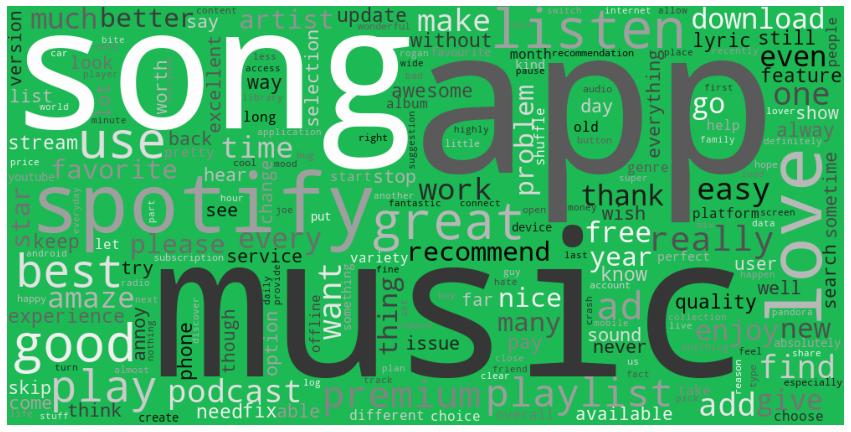

In [28]:
# Wordcloud for good reviews
goodrev = df_train_test[df_train_test['Rating'] == 'Good']['ReviewCleaned']

plt.figure(figsize=(15,15))
wordcloudgood = WordCloud(max_words=1000, min_font_size=10, height=500, width=1000, background_color='#1db954', colormap='gist_yarg', collocations=False).generate(' '.join(goodrev))

plt.axis('off')
plt.imshow(wordcloudgood)


In [29]:
# See top 10 words
goods = pd.DataFrame(wordcloudgood.process_text(''.join(goodrev)).items()).sort_values(1, ascending=False)
    
for i in range(10):
  item = goods.iloc[i]
  print(item[0] + ' \t= ' + str(item[1]))

music 	= 13458
app 	= 13271
song 	= 9767
spotify 	= 6822
listen 	= 5738
use 	= 4138
play 	= 3818
love 	= 3687
good 	= 3514
playlist 	= 3166


- Top 10 words pada review dengan sentimen `Good` adalah music, app, song, spotify, listen, use, play, love, good, and playlist.

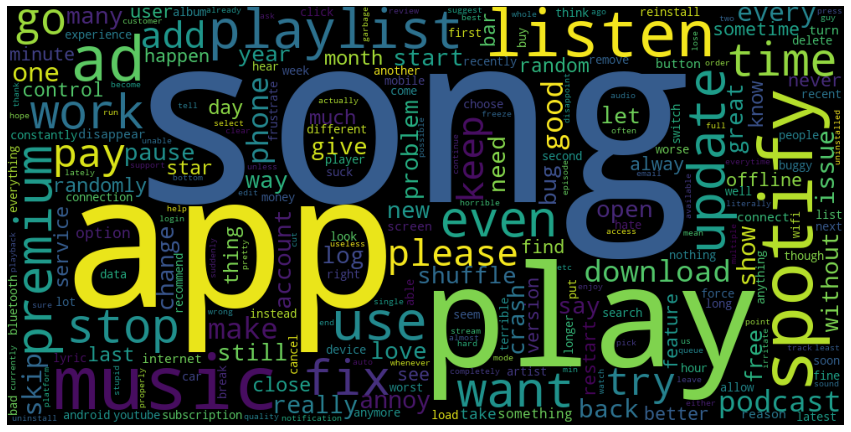

In [30]:
# Wordcloud for bad reviews 
badrev = df_train_test[df_train_test['Rating'] == 'Bad']['ReviewCleaned']

plt.figure(figsize=(15,15))
wordcloudbad = WordCloud(max_words=1000, min_font_size=10, height=500, width=1000, background_color='Black', collocations=False).generate(' '.join(badrev))

plt.axis('off')
plt.imshow(wordcloudbad)

In [31]:
# See top 10 words
bads = pd.DataFrame(wordcloudgood.process_text(''.join(badrev)).items()).sort_values(1, ascending=False)
    
for i in range(10):
  item = bads.iloc[i]
  print(item[0] + ' \t= ' + str(item[1]))

song 	= 20647
app 	= 17125
play 	= 15973
music 	= 9263
spotify 	= 7894
listen 	= 7104
ad 	= 6021
playlist 	= 5996
even 	= 5365
use 	= 5246


- Top 10 words pada review dengan sentimen `Bad` adalah song, app, play, music, spotify, listen, ad, playlist, even, use.
- Kata- kata paling banyak muncul pada review `Bad` tidak jauh berbeda dari kata-kata paling banyak muncul pada review `Good`. Kata 'ad' yang masuk top 10 words pada bad reviews, mungkin diakrenakan banyak complain terkait ads.

# **7 - Model Definition** 

In [32]:
# Creating the Model

#Optimizer
optimizer = Adam(lr=0.0001)

model4 = Sequential()

model4.add(text_vectorization)
model4.add(embedding)
model4.add(Dropout(0.50))

model4.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(15)))
model4.add(Dropout(0.50))
model4.add(Dense(15, activation='relu', kernel_initializer='he_normal'))
model4.add(Dropout(0.50))
model4.add(Dense(1, activation='sigmoid'))

# compile
model4.compile(loss='binary_crossentropy', 
                         optimizer=optimizer,
                         metrics= 'accuracy')
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 149)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 149, 64)           1259392   
                                                                 
 dropout (Dropout)           (None, 149, 64)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 30)               9600      
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense (Dense)               (None, 15)                4

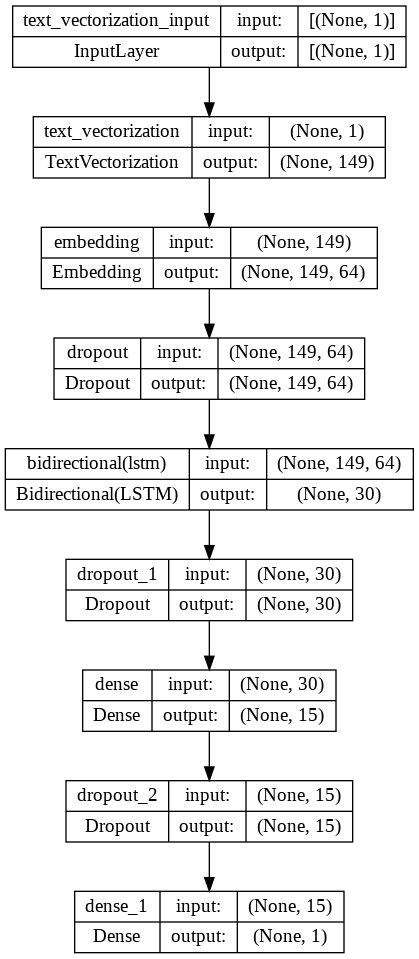

In [33]:
# plot layers

tf.keras.utils.plot_model(model4, show_shapes=True)

1. Model ini memiliki 5 layer. Yaitu  input layer, layer TextVectorization, layer Embedding, layer Bidirectional LSTM, dense layer, dan output layer.
  - Layer TextVectorization dan Embedding adalah layer dimana teks/karakter diubah menjadi representasi angka vektornya, dengan output sequence length sejumlah panjang maksimal dalam dokumen.
  - Bidirectional LSTM digunakan karena tipe RNN ini lebih dipilih untuk kasus-kasus NLP. Karena tipe ini memungkinkan untuk memberikan konteks  untuk kata dari kata-kata setelah dan sebelumnya. Sehingga training lebih baik.
  - Setelah layer ini, terdapat satu dense layer dan output layer.
  - Dense layer memiliki 15 neurons, dengan activation function `relu` dan kernel_initializer `He_normal`.
  - Output layer memiliki 1 neuron dengan activation function `sigmoid`.
  - Diantara tiap layer, ditambahkan dropout 0.5. Hal ini berarti 50% random neuron pada layer sebelumnya diabaikan pada layer setelahnya.

2. Optimizer yang digunakan adalah Adam dengan learning rate 0.0001.

3. Metrics yang digunakan adalah accuracy. Tidak digunakannya metrics recall/f1 score karena data yang kita miliki sudah cukup balance.

# **8 - Model Training**

Training dilakukan dengan epoch 50, menggunakan callback berupa EarlyStopping yang monitornya adalah val_loss. Batch size sebesar 64 (jumlah batch size yang cukup digunakan).

In [34]:
# Callbacks
callback = EarlyStopping(monitor='val_loss', patience=4)

# Train the model
history4 = model4.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/50
696/696 [==============================] - 21s 18ms/step - loss: 0.6214 - accuracy: 0.6742 - val_loss: 0.4673 - val_accuracy: 0.8050
Epoch 2/50
696/696 [==============================] - 11s 16ms/step - loss: 0.4490 - accuracy: 0.8163 - val_loss: 0.3659 - val_accuracy: 0.8538
Epoch 3/50
696/696 [==============================] - 11s 17ms/step - loss: 0.3992 - accuracy: 0.8462 - val_loss: 0.3423 - val_accuracy: 0.8639
Epoch 4/50
696/696 [==============================] - 12s 17ms/step - loss: 0.3747 - accuracy: 0.8596 - val_loss: 0.3333 - val_accuracy: 0.8681
Epoch 5/50
696/696 [==============================] - 13s 19ms/step - loss: 0.3614 - accuracy: 0.8674 - val_loss: 0.3302 - val_accuracy: 0.8698
Epoch 6/50
696/696 [==============================] - 12s 17ms/step - loss: 0.3500 - accuracy: 0.8735 - val_loss: 0.3269 - val_accuracy: 0.8693
Epoch 7/50
696/696 [==============================] - 11s 16ms/step - loss: 0.3429 - accuracy: 0.8747 - val_loss: 0.3252 - val_accuracy:

# **9 - Model  Evaluation**

In [35]:
# Create Dataframe

history_df4 = pd.DataFrame(history4.history)

history_df4

,loss,accuracy,val_loss,val_accuracy
0,0.621431,0.674158,0.467254,0.805018
1,0.449016,0.816312,0.365909,0.853795
2,0.399232,0.846182,0.342275,0.863856
3,0.374710,0.859599,0.333272,0.868059
4,0.361351,0.867375,0.330181,0.869842
5,0.349968,0.873533,0.326919,0.869333
6,0.342908,0.874747,0.325201,0.872007
7,0.335605,0.880433,0.324789,0.873153
8,0.326474,0.883445,0.326538,0.869587
9,0.324319,0.883557,0.325585,0.871880


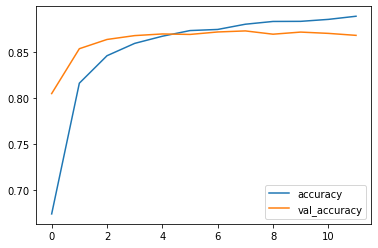

In [36]:
# Plot between Accuracy and val_accuracy

history_df4[['accuracy', 'val_accuracy']].plot()

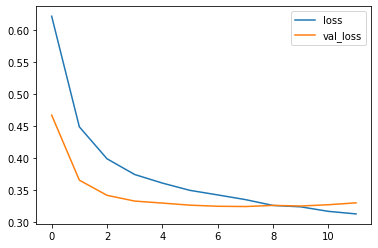

In [37]:
# Plot between loss and val_loss

history_df4[['loss', 'val_loss']].plot()

In [38]:
# Model Evaluation using Classification Report

from sklearn.metrics import classification_report  

y_pred3= model4.predict(X_test)
y_pred3= np.where(y_pred3 >= 0.5, 1, 0)
y_pred3

print(classification_report(y_test, y_pred3))

289/289 [==============================] - 3s 7ms/step
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4696
           1       0.88      0.84      0.86      4542

    accuracy                           0.87      9238
   macro avg       0.87      0.87      0.87      9238
weighted avg       0.87      0.87      0.87      9238



In [39]:
# Freeze model
model4.trainable = False

- Hasil grafik menunjukkan bahwa menjelang epoch terakhir accuracy validasi semakin menurun menjauhi accuracy training set. Begitu juga dengan loss, loss pada validation set semakin naik menjauhi training. Jika training terus dilakukan maka akan semakin besar gap antara val dan training set. Hal ini menunjukkan model overfit.
- Dari hasil classification report, nilai f1-score untuk kategori 0 adalah 0.87 dan f1-score untuk kategori 1 adalah 0.86. Dengan overall accuracy sebesar 0.87.


# **10 - Model Improvement**

In [40]:
# Creating the Model

#Optimizer
optimizer = Adam(lr=0.0001)

model5 = Sequential()

model5.add(text_vectorization)
model5.add(embedding)
model5.add(Dropout(0.50))

model5.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(15)))
model5.add(Dropout(0.50))
model5.add(Dense(10, activation='relu', kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model5.add(Dropout(0.50))
model5.add(Dense(1, activation='sigmoid'))

# compile
model5.compile(loss='binary_crossentropy', 
                         optimizer=optimizer,
                         metrics= ['accuracy'])
model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 149)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 149, 64)           1259392   
                                                                 
 dropout_3 (Dropout)         (None, 149, 64)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 30)               7290      
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 10)               

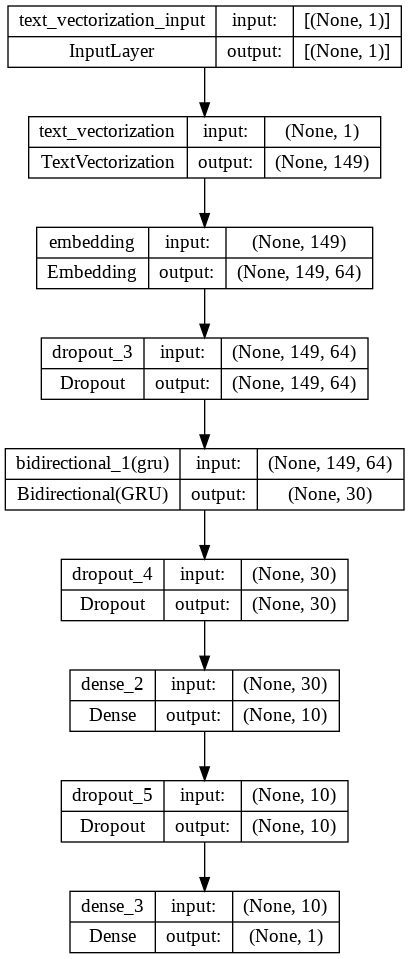

In [41]:
# plot layers

tf.keras.utils.plot_model(model5, show_shapes=True)

Pada model improvement, improvement yang dilakukan yaitu:

- Mengganti bidirectional LSTM layer menjadi bidirectional GRU.
- Menambahkan regularization l2 pada dense layer.

Training dilakukan dengan epoch 50, menggunakan callback berupa EarlyStopping yang monitornya adalah val_loss. Batch size sebesar 64 (jumlah batch size yang cukup digunakan).

In [42]:
# Callbacks
callback = EarlyStopping(monitor='val_loss', patience=4)

# Train the model
history5 = model5.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/50
696/696 [==============================] - 15s 17ms/step - loss: 0.8150 - accuracy: 0.6273 - val_loss: 0.6996 - val_accuracy: 0.8087
Epoch 2/50
696/696 [==============================] - 11s 15ms/step - loss: 0.5837 - accuracy: 0.8223 - val_loss: 0.4734 - val_accuracy: 0.8583
Epoch 3/50
696/696 [==============================] - 11s 15ms/step - loss: 0.4878 - accuracy: 0.8616 - val_loss: 0.4243 - val_accuracy: 0.8682
Epoch 4/50
696/696 [==============================] - 11s 15ms/step - loss: 0.4426 - accuracy: 0.8749 - val_loss: 0.3993 - val_accuracy: 0.8683
Epoch 5/50
696/696 [==============================] - 11s 15ms/step - loss: 0.4129 - accuracy: 0.8792 - val_loss: 0.3862 - val_accuracy: 0.8642
Epoch 6/50
696/696 [==============================] - 11s 15ms/step - loss: 0.3966 - accuracy: 0.8820 - val_loss: 0.3711 - val_accuracy: 0.8696
Epoch 7/50
696/696 [==============================] - 11s 15ms/step - loss: 0.3817 - accuracy: 0.8829 - val_loss: 0.3649 - val_accuracy:

In [43]:
# Create Dataframe

history_df5 = pd.DataFrame(history5.history)

history_df5

,loss,accuracy,val_loss,val_accuracy
0,0.815043,0.627253,0.699617,0.808711
1,0.583699,0.822313,0.473401,0.858253
2,0.487768,0.861577,0.424259,0.868186
3,0.442580,0.874882,0.399324,0.868314
4,0.412868,0.879197,0.386240,0.864238
5,0.396553,0.881984,0.371115,0.869587
6,0.381722,0.882928,0.364920,0.868951
7,0.371417,0.883580,0.359452,0.868059
8,0.363072,0.884681,0.354307,0.869969
9,0.360235,0.883872,0.351969,0.870224


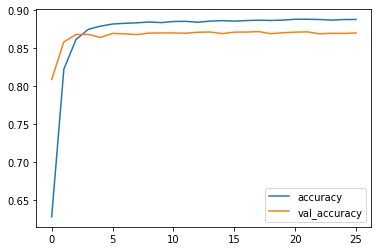

In [44]:
# Plot between Accuracy and val_accuracy

history_df5[['accuracy', 'val_accuracy']].plot()

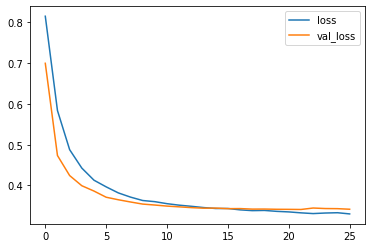

In [45]:
# Plot between Accuracy and val_accuracy

history_df5[['loss', 'val_loss']].plot()

In [46]:
# Model Evaluation using Classification Report

from sklearn.metrics import classification_report  

y_pred5= model5.predict(X_test)
y_pred5= np.where(y_pred5 >= 0.5, 1, 0)
y_pred5

print(classification_report(y_test, y_pred5))

289/289 [==============================] - 4s 10ms/step
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4696
           1       0.89      0.83      0.86      4542

    accuracy                           0.87      9238
   macro avg       0.87      0.86      0.87      9238
weighted avg       0.87      0.87      0.87      9238



In [47]:
# Freeze model
model5.trainable = False

- Kedua grafik menunjukkan bahwa model masih overfit namun sedikit lebih baik dari model sebelum improvement.
- Nilai recall untuk kategori 0 naik 0.01, sedangkan precision untuk kategori 1 naik 0.01. Nilai f1-score tidak berubah dan nilai akurasi juga tidak berubah.

# **11 - Model Saving**

In [58]:
# Save files

model5.save('model_spotify')

! zip -r model_spotify.zip model_spotify

updating: model_spotify/ (stored 0%)
updating: model_spotify/keras_metadata.pb (deflated 90%)
updating: model_spotify/variables/ (stored 0%)
updating: model_spotify/variables/variables.data-00000-of-00001 (deflated 7%)
updating: model_spotify/variables/variables.index (deflated 65%)
updating: model_spotify/saved_model.pb (deflated 87%)
updating: model_spotify/assets/ (stored 0%)


# **12 - Model Inference**

In [49]:
# Preprocessing inference

df_inf1['Review'] = df_inf1['Review'].apply(lambda x: clean_rev(x))

In [50]:
df_inf1

,Review,Rating
0,best experience easy use favourite songs spoti...,Good
1,ads,Bad
2,love old version app new one not good not use ...,Bad
3,one apps download new phone easy use tech dino...,Good
4,delete app not need another source receive fak...,Bad
5,amaze app not select songs every minutes drive...,Good
6,app suck bring back see full albums hear previ...,Bad
7,latest update app stop music reason play bar d...,Bad
8,choice resort stream every conceivably conveni...,Bad
9,happy app playlist easy build edit use music s...,Good


In [59]:
# Predict 

y_pred = model5.predict(df_inf1.Review)
y_pred = np.where(y_pred >= 0.5, 1, 0)
y_pred

1/1 [==============================] - 0s 24ms/step


array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1]])

In [60]:
# Transform back to the original category
y_pred1= le.inverse_transform(y_pred)

In [61]:
# Create DataFrame of Sentiment Prediction

pred_inf = pd.DataFrame(y_pred1, columns=['Sentiment Prediction'])

df_final = pd.concat([df_inf1, pred_inf], axis=1)

df_final

,Review,Rating,Sentiment Prediction
0,best experience easy use favourite songs spoti...,Good,Good
1,ads,Bad,Good
2,love old version app new one not good not use ...,Bad,Bad
3,one apps download new phone easy use tech dino...,Good,Good
4,delete app not need another source receive fak...,Bad,Bad
5,amaze app not select songs every minutes drive...,Good,Good
6,app suck bring back see full albums hear previ...,Bad,Bad
7,latest update app stop music reason play bar d...,Bad,Bad
8,choice resort stream every conceivably conveni...,Bad,Good
9,happy app playlist easy build edit use music s...,Good,Good


Pada data inference, model berhasil mengklasifikasi 8 sentimen dari data secara tepat dari keseluruhan 10 data.

# **13 - Conclusions**

## EDA Analysis

- Rating paling banyak adalah rating 5 dengan jumlah rating lebih dari 22000. Lalu rating terbanyak kedua adalah rating 1 dengan 17600 rating.
- Thumbs up paling banyak yang didapatkan oleh review adalah 8195.
- 51.4% Review memiliki sentimen `Bad`, sedangkan 48.6% review lainnya memiliki sentimen `good`. 
- Dataset yang kita miliki cukup balance. Sehingga tidak diperlukan handling imbalance.
- Jumlah review spotify per hari cenderung naik turun.
- Pada awal bulan Maret 2022 terdapat lonjakan review yang ditulis oleh user Spotify.
- Lalu, pada pertengahan bulan April 2022 terdapat juga lonjakan review yang ditulis oleh user.
- Top 10 words pada review dengan sentimen `Good` adalah music, app, song, spotify, listen, use, play, love, good, and playlist.
- Top 10 words pada review dengan sentimen `Bad` adalah song, app, play, music, spotify, listen, ad, playlist, even, use.
- Kata- kata paling banyak muncul pada review `Bad` tidak jauh berbeda dari kata-kata paling banyak muncul pada review `Good`. Kata 'ad' yang masuk top 10 words pada bad reviews, mungkin diakrenakan banyak complain terkait ads.


## Model Analysis

1. Model ini memiliki 5 layer. Yaitu  input layer, layer TextVectorization, layer Embedding, layer Bidirectional LSTM, dense layer, dan output layer.
  - Layer TextVectorization dan Embedding adalah layer dimana teks/karakter diubah menjadi representasi angka vektornya, dengan output sequence length sejumlah panjang maksimal dalam dokumen.
  - Bidirectional LSTM digunakan karena tipe RNN ini lebih dipilih untuk kasus-kasus NLP. Karena tipe ini memungkinkan untuk memberikan konteks  untuk kata dari kata-kata setelah dan sebelumnya. Sehingga training lebih baik.
  - Setelah layer ini, terdapat satu dense layer dan output layer.
  - Dense layer memiliki 15 neurons, dengan activation function `relu` dan kernel_initializer `He_normal`.
  - Output layer memiliki 1 neuron dengan activation function `sigmoid`.
  - Diantara tiap layer, ditambahkan dropout 0.5. Hal ini berarti 50% random neuron pada layer sebelumnya diabaikan pada layer setelahnya.

2. Optimizer yang digunakan adalah Adam dengan learning rate 0.0001.

3. Metrics yang digunakan adalah accuracy. Tidak digunakannya metrics recall/f1 score karena data yang kita miliki sudah cukup balance.

**Model Training**

Training dilakukan dengan epoch 50, menggunakan callback berupa EarlyStopping yang monitornya adalah val_loss. Batch size sebesar 64 (jumlah batch size yang cukup digunakan).

**Model Evaluation Before Improvement**

- Hasil grafik menunjukkan bahwa menjelang epoch terakhir accuracy validasi semakin menurun menjauhi accuracy training set. Begitu juga dengan loss, loss pada validation set semakin naik menjauhi training. Jika training terus dilakukan maka akan semakin besar gap antara val dan training set. Hal ini menunjukkan model overfit.
- Dari hasil classification report, nilai f1-score untuk kategori 0 adalah 0.87 dan f1-score untuk kategori 1 adalah 0.86. Dengan overall accuracy sebesar 0.87.


**Model Evaluation After Improvement**

- Kedua grafik menunjukkan bahwa model masih overfit namun sedikit lebih baik dari model sebelum improvement.
- Nilai recall untuk kategori 0 naik 0.01, sedangkan precision untuk kategori 1 naik 0.01. Nilai f1-score tidak berubah dan nilai akurasi juga tidak berubah.
- Karena improvement ini, model setelah improvement yang akan digunakan sebagai final model.


## Recommendation

Model masih perlu ditingkatkan.  Dapat dilakukan dengan:
- Menggunakan transfer learning.
- Tuning parameter model menggunakan GridSearchCV.
- Memaksimalkan proses preprocessing corpus.
- Menambah data.